(Singular Value Decomposition) SVD is a framework for dimenionality reduction tasks. 

In [51]:
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

In [52]:
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

n_row,n_col = 3,3
n_components = n_row * n_col
image_shape=(64,64)
rng = RandomState(0)



In [53]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
images = dataset.images
descr = dataset.DESCR

print(descr)
n_samples,n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of faces and features ",n_samples,n_features)



Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

Dataset consists of faces and features  400 4096


In [54]:
def plotGallery(title, images,n_row=n_row,n_col=n_col):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row,n_col,i+1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)




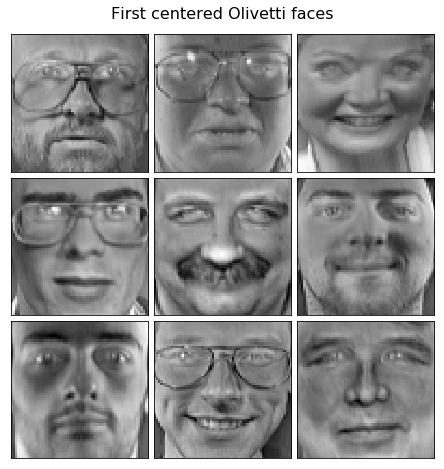

In [55]:
plotGallery("First centered Olivetti faces", faces_centered[:n_components])
plt.show()

In [66]:
estimators=[('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),]


Extracting the top 9 Eigenfaces - PCA using randomized SVD...
done in 0.171s


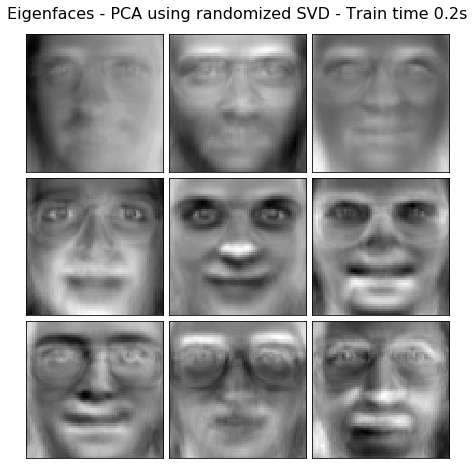

In [70]:
for name, estimator,center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    
    estimator.fit(data)
    
    components_ = estimator.components_
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    plotGallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])
 
    plt.show()
    